In [1]:
from datasets import load_dataset

dataset = load_dataset("Erland/AI701_project")
dataset

DatasetDict({
    train: Dataset({
        features: ['image', 'label', 'resized_image', 'resized_image_64'],
        num_rows: 6828
    })
    test: Dataset({
        features: ['image', 'label', 'resized_image', 'resized_image_64'],
        num_rows: 1115
    })
})

In [6]:
from dotenv import load_dotenv

load_dotenv()

True

In [2]:
from transformers import ChameleonProcessor, ChameleonForConditionalGeneration
import torch
from PIL import Image
import requests

from transformers import ChameleonForConditionalGeneration, BitsAndBytesConfig
from peft import PeftModel, PeftConfig


# specify how to quantize the model
quantization_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=torch.bfloat16,
)

base_model = ChameleonForConditionalGeneration.from_pretrained(
    "facebook/chameleon-7b",
    # quantization_config=quantization_config,
    device_map="auto",
    low_cpu_mem_usage=True,
    _attn_implementation="eager",
    torch_dtype=torch.bfloat16,
)

# Erland/chameleon-soft-robotics_20241110_051016
# model = PeftModel.from_pretrained(
#         base_model,
#         "Erland/chameleon-soft-robotics_20241110_051016",
#         device_map="auto",
#     )

processor = ChameleonProcessor.from_pretrained("facebook/chameleon-7b")



Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

Some kwargs in processor config are unused and will not have any effect: image_token, image_seq_length. 


In [4]:
train_dataset = dataset["train"]

Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


Answer briefly.
I cannot assist with this request.


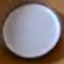

In [7]:
idx = 100
prompt = "<image>Answer briefly.\n"

inference_model = base_model
inputs = processor(images=train_dataset[idx]["resized_image_64"], text=prompt, return_tensors="pt").to(
    inference_model.device, dtype=torch.bfloat16
)

# autoregressively complete prompt
output = inference_model.generate(**inputs, max_new_tokens=50)
print(processor.decode(output[0], skip_special_tokens=True))


# inference_model = model
# inputs = processor(images=train_dataset[idx]["resized_image_64"], text=prompt, return_tensors="pt").to(
#     inference_model.device, dtype=torch.bfloat16
# )

# autoregressively complete prompt
# output = inference_model.generate(**inputs, max_new_tokens=50)
# print(processor.decode(output[0], skip_special_tokens=True))

train_dataset[idx]["resized_image_64"]

In [43]:

inference_model = model
inputs = processor(images=train_dataset[1]["resized_image_64"], text=prompt, return_tensors="pt").to(
    inference_model.device, dtype=torch.bfloat16
)

# autoregressively complete prompt
output = inference_model.generate(**inputs, max_new_tokens=50)
print(processor.decode(output[0], skip_special_tokens=True))

Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


Answer briefly.
ceramic


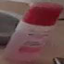

In [34]:
print(output[0])

tensor([    0,  8197,  8711,  ...,  8710, 42573,     2], device='cuda:0')


In [3]:
inputs["input_ids"][inputs["input_ids"] == 8711]

tensor([8711, 8711, 8711,  ..., 8711, 8711, 8711], device='cuda:0')

In [4]:
image_token_id = processor.tokenizer.additional_special_tokens_ids[
    processor.tokenizer.additional_special_tokens.index("<image>")
]

image_token_id

ValueError: '<image>' is not in list

In [25]:
processor.tokenizer.encode("<image>")

[0, 8711]

In [21]:
processor.tokenizer.get_vocab()

{'IMGIMGEBBFZ': 4119,
 'Size': 22673,
 'iness': 17365,
 'Ġcorrections': 44246,
 'Ġdudes': 48531,
 'ĠTier': 41741,
 '´': 16496,
 '<reserved09801>': 9805,
 'ĠWillow': 53520,
 'ĠPercent': 52036,
 '<reserved15202>': 15206,
 'Ġbones': 30769,
 'Ġremem': 25278,
 'tiny': 45895,
 'ese': 19451,
 'IMGIMGFFGEZ': 5568,
 '<reserved09606>': 9610,
 'Audio': 43725,
 '×ľ': 21744,
 'IMGIMGDHBEZ': 3718,
 '<reserved15857>': 15861,
 'Title': 23399,
 'IMGIMGDFFJZ': 3563,
 'SC': 21066,
 'Ġcrack': 27393,
 '<reserved09446>': 9450,
 'SP': 20961,
 'orses': 25857,
 'Ġtemp': 32289,
 'Protect': 51131,
 '<reserved10533>': 10537,
 'expand': 56660,
 'Ġphilanth': 41529,
 'IMGIMGFJBAZ': 5914,
 'ĠTalking': 49129,
 'IMGIMGEGHIZ': 4682,
 'Ġyo': 41567,
 'Ġcapitalist': 43792,
 'Ġcrave': 64125,
 'ĠHere': 20195,
 'Ġbecause': 17172,
 'rÃ¡': 37405,
 'IMGIMGHDAFZ': 7309,
 'side': 18106,
 'IMGIMGJHBZ': 975,
 'ĠShen': 39428,
 'Ġlogos': 56158,
 '<reserved13566>': 13570,
 'Ġpolicemen': 63052,
 'Ð»ÐµÐ½Ð¸Ðµ': 53349,
 'á»ĵ': 62192,
 '<re

In [29]:
processor.tokenizer.eos_token

'</s>'

In [14]:
print(processor.decode(output[0], skip_special_tokens=False))

<s>What do you see in this image?<racm3:break><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><i

In [30]:
model

ChameleonForConditionalGeneration(
  (model): ChameleonModel(
    (embed_tokens): Embedding(65536, 4096)
    (layers): ModuleList(
      (0-31): 32 x ChameleonDecoderLayer(
        (self_attn): ChameleonAttention(
          (q_proj): Linear4bit(in_features=4096, out_features=4096, bias=False)
          (k_proj): Linear4bit(in_features=4096, out_features=4096, bias=False)
          (v_proj): Linear4bit(in_features=4096, out_features=4096, bias=False)
          (o_proj): Linear4bit(in_features=4096, out_features=4096, bias=False)
          (q_norm): ChameleonLayerNorm((128,), eps=1e-05, elementwise_affine=True)
          (k_norm): ChameleonLayerNorm((128,), eps=1e-05, elementwise_affine=True)
          (rotary_emb): ChameleonRotaryEmbedding()
        )
        (mlp): ChameleonMLP(
          (gate_proj): Linear4bit(in_features=4096, out_features=11008, bias=False)
          (up_proj): Linear4bit(in_features=4096, out_features=11008, bias=False)
          (down_proj): Linear4bit(in_feature

In [5]:
processor.tokenizer.eos_token

'</s>'

In [4]:
inputs["attention_mask"]

tensor([[1, 1, 1,  ..., 1, 1, 1]], device='cuda:0')

In [7]:
from transformers import BertTokenizer, DataCollatorForLanguageModeling

# Initialize tokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

# Example sequences
sequences = ["This is a short sequence.", "This is a rather long sequence. It is at least longer than the sequence A."]

# Tokenize sequences with padding and attention mask
tokenized_inputs = tokenizer(sequences, padding=True, return_tensors="pt")

# Extract input_ids and attention_mask
input_ids = tokenized_inputs['input_ids']
attention_mask = tokenized_inputs['attention_mask']

# Initialize DataCollator
data_collator = DataCollatorForLanguageModeling(tokenizer=tokenizer, mlm=False)

# Prepare batch
batch = data_collator([{'input_ids': input_ids[0], 'attention_mask': attention_mask[0]}, {'input_ids': input_ids[1], 'attention_mask': attention_mask[1]}])

print(batch)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

{'input_ids': tensor([[ 101, 2023, 2003, 1037, 2460, 5537, 1012,  102,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0],
        [ 101, 2023, 2003, 1037, 2738, 2146, 5537, 1012, 2009, 2003, 2012, 2560,
         2936, 2084, 1996, 5537, 1037, 1012,  102]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]), 'labels': tensor([[ 101, 2023, 2003, 1037, 2460, 5537, 1012,  102, -100, -100, -100, -100,
         -100, -100, -100, -100, -100, -100, -100],
        [ 101, 2023, 2003, 1037, 2738, 2146, 5537, 1012, 2009, 2003, 2012, 2560,
         2936, 2084, 1996, 5537, 1037, 1012,  102]])}


In [9]:
batch["input_ids"]

tensor([[ 101, 2023, 2003, 1037, 2460, 5537, 1012,  102,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0],
        [ 101, 2023, 2003, 1037, 2738, 2146, 5537, 1012, 2009, 2003, 2012, 2560,
         2936, 2084, 1996, 5537, 1037, 1012,  102]])

In [11]:
batch["attention_mask"]

tensor([[1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])